<h1 align=center><font size = 6>The Battle of Neighborhoods (Week 2)-</font></h1>
<h1 align=center><font size = 6>Private Property Sales Prices Data Analysis of Singapore</font></h1>
<h1 align=center><font size = 5>Su Yiping</font></h1>

## Introduction

In this project, I will analyse the various venues of finding useful insights into the kind of business thriving in different localities. Analysis will be based on the number and category of venues of various types present in Singapore.And help a group of stakeholders solve a problem about acquisition and selling of real estate.

- Scrape the following Wikipedia page, https://en.wikipedia.org/wiki/Postal_codes_in_Singapore, for getting the data that is in the table of postal codes and to transform the data
- Get the geographical coordinates of the neighborhoods in the Toronto.
- Generate maps to visualize your neighborhoods and how they cluster together
- Information Visualization and visual analytics within data
    1. Using Pie Graph Top Business Type Ratio for Singapore
    2. Using Pie Chart Analyize Top Business Type for Every General Location in Singapore
    3. Using Bar Graph Analyze Food, Outdoors & Recreation and Shop & Service for Postal District in Singapore
    4. Using Line Chart Analyze Private Residential Property Prices for Singapore from 1975 Q1 -- 2019 Q4
    5. Using 3D Point Plot Analyze Private Residential Property Unit Prices for Singapore
    6. Using 3D Bar Analyze Private Residential Property Sale Area for Singapore
    7. Using Box Plot Analyze Private Residential Property Total Prices by Postal District for Singapore
    8. Using Scatter Graph Compare Total Sale Prices of Private Property by Market Segment in Singapore from Mar-2017 to Mar-2020
    9. Using Bar Chart Compare Total Sale Area of Private Property by Market Segment in Singapore from Mar-2017 to Mar-2020
    10. Using 3D Surface Plot Analyze Mean of Unit Price of Private Property for Singapore from Mar-2017 to Mar-2020
    11. Using Word Cloud Analyze Number of Private Property Project for Every Area in Singapore from Mar-2017 to Mar-2020

In [1]:
# importing necessary libraries
import pandas as pd  # two dimentional data structure
from bs4 import BeautifulSoup  #for pulling data out of HTML and XML files
import requests   # an elegant and simple HTTP library
import json # mainly used to convert the python dictionary above into a JSON string that can be written into a file
import geocoder  #converting addresses into coordinates or vice versa, is a really common GIS task
import folium   # map rendering library
from geopy.geocoders import Nominatim  # OSM(OpenStreetMap) data
from sklearn.cluster import KMeans  # k-means clustering algorithm
from tqdm import tqdm  #  a progress bar library with good support for nested loops
from collections import deque  # containers that are used to store collections of data, for example, list, dict, set, tuple etc.
import matplotlib.cm as cm  # Builtin colormaps, colormap handling utilities, and the ScalarMappable mixin.
import matplotlib.colors as colors  # converting numbers or color arguments to RGB or RGBA
import numpy as np # provides a powerful n-dimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing
import matplotlib.pyplot as plt # manipulate elements of a figure, such as creating a figure, creating a plotting area, plotting lines, adding plot labels, etc.
from datetime import datetime   # manipulating dates and times in both simple and complex ways
from mpl_toolkits.mplot3d import Axes3D  # created just like any other axes using the projection=‘3d’ keyword.
import seaborn as sns  # for making statistical graphics
from wordcloud import WordCloud, STOPWORDS  # provide an excellent option to analyze the text data through visualization in the form of tags, or words, where the importance of a word is explained by its frequency.
import random   # Generates a random number


Using BeautifulSoup package scrape website data

In [2]:
url = "https://en.wikipedia.org/wiki/Postal_codes_in_Singapore"
wiki_page = requests.get(url).text

# using beautiful soup to parse the HTML/XML codes.
soup = BeautifulSoup(wiki_page, 'html.parser')

In [3]:
# Cleanup Data and Convert content of Postal district HTML table as list of data
data = []
for tr in soup.tbody.find_all('tr'):
    data.append([ td.get_text().strip() for td in tr.find_all('td')])

Creating datafrme from scraping website data

In [4]:
#Create the dataframe
df = pd.DataFrame(data, columns=['Postal district','Postal sector','General location'])
df.dropna(inplace=True) #Remove all "None" rows
df.head()

Postal district           Postal sector  \
1              01  01, 02, 03, 04, 05, 06   
2              02                  07, 08   
3              03              14, 15, 16   
4              04                  09, 10   
5              05              11, 12, 13   

                                    General location  
1        Raffles Place, Cecil, Marina, People's Park  
2                               Anson, Tanjong Pagar  
3               Bukit Merah, Queenstown, Tiong Bahru  
4                        Telok Blangah, Harbourfront  
5  Pasir Panjang, Hong Leong Garden, Clementi New...

In [5]:
# size of dataframe
df.shape

(28, 3)

Transfer data from json file to dataframe

In [6]:
# Add latitude and longitude to dataframe from district.json
district_data = None
with open('district.json') as json_data:
    district_data = json.load(json_data)
district_dataframe_Latitude =[]
district_dataframe_Longitude =[]
for data_district in district_data:
    district_dataframe_Latitude.append(data_district['latitude'])
    district_dataframe_Longitude.append(data_district['longitude'])
df["latitude"] = district_dataframe_Latitude
df["longitude"] = district_dataframe_Longitude
df

Postal district           Postal sector  \
1               01  01, 02, 03, 04, 05, 06   
2               02                  07, 08   
3               03              14, 15, 16   
4               04                  09, 10   
5               05              11, 12, 13   
6               06                      17   
7               07                  18, 19   
8               08                  20, 21   
9               09                  22, 23   
10              10          24, 25, 26, 27   
11              11              28, 29, 30   
12              12              31, 32, 33   
13              13          34, 35, 36, 37   
14              14          38, 39, 40, 41   
15              15          42, 43, 44, 45   
16              16              46, 47, 48   
17              17              49, 50, 81   
18              18                  51, 52   
19              19          53, 54, 55, 82   
20              20                  56, 57   
21              21                  58, 59   
22              22      60, 61, 62, 63, 64   
23              23          65, 66, 67, 68   
24              24              69, 70, 71   
25              25                  72, 73   
26              26                  77, 78   
27              27                  75, 76   
28              28                  79, 80   

                                     General location  latitude   longitude  
1         Raffles Place, Cecil, Marina, People's Park  1.281632  103.857248  
2                                Anson, Tanjong Pagar  1.272167  103.842780  
3                Bukit Merah, Queenstown, Tiong Bahru  1.286189  103.817772  
4                         Telok Blangah, Harbourfront  1.271282  103.817022  
5   Pasir Panjang, Hong Leong Garden, Clementi New...  1.295909  103.777698  
6                      High Street, Beach Road (part)  1.292577  103.849194  
7                            Middle Road, Golden Mile  1.300595  103.858292  
8    Little India, Farrer Park, Jalan Besar, Lavender  1.310853  103.854434  
9                    Orchard, Cairnhill, River Valley  1.302264  103.839234  
10        Ardmore, Bukit Timah, Holland Road, Tanglin  1.313139  103.806978  
11                     Watten Estate, Novena, Thomson  1.333708  103.819433  
12                    Balestier, Toa Payoh, Serangoon  1.327013  103.857367  
13                               Macpherson, Braddell  1.334289  103.874079  
14                                     Geylang, Eunos  1.324518  103.899600  
15                      Katong, Joo Chiat, Amber Road  1.303239  103.899318  
16       Bedok, Upper East Coast, Eastwood, Kew Drive  1.325951  103.946807  
17                                     Loyang, Changi  1.348583  103.998237  
18                         Simei, Tampines, Pasir Ris  1.364046  103.942106  
19                 Serangoon Garden, Hougang, Punggol  1.376567  103.896745  
20                                 Bishan, Ang Mo Kio  1.364015  103.835022  
21       Upper Bukit Timah, Clementi Park, Ulu Pandan  1.345982  103.781288  
22                                       Jurong, Tuas  1.401838  103.701678  
23  Hillview, Dairy Farm, Bukit Panjang, Choa Chu ...  1.421165  103.769110  
24                               Lim Chu Kang, Tengah  1.334011  103.694845  
25                       Kranji, Woodgrove, Woodlands  1.373602  103.759399  
26                          Upper Thomson, Springleaf  1.396476  103.818671  
27                                  Yishun, Sembawang  1.435321  103.837353  
28                                            Seletar  1.407048  103.868455

Using geolocator get the latitude and longitude of Singapore

In [7]:
# extracted latitude and longitude of Singapore

address = 'Singapore'

geolocator = Nominatim() # get OSM(OpenStreetMap) data
location = geolocator.geocode(address) # get the geogragraphical coordinates of Toronto
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Singaproe are {}, {}.'.format(latitude, longitude))

C:\Users\GUOCHENGGUANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


The geograpical coordinate of Singaproe are 1.357107, 103.8194992.


In [8]:
# creat the Singapore map
map_Singapore = folium.Map(location = [latitude, longitude], zoom_start = 12)

# add markers to map
for lat, lng, location in zip(df['latitude'], df['longitude'], df['General location']):
    label = '{}'.format(location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Singapore)  

map_Singapore

Setting Foursquare API configure

In [ ]:
#Configure Foursquare access
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Get the location of top place for every Postal Segment in Singapore from Foursquare website

In [10]:
#Make a function that takes the names and locations of the location in Singapore
def getNearbyVenues(names, latitudes, longitudes, radius=2500, LIMIT = 200):
    
    venues_list=[]
    for name, lat, lng in tqdm(zip(names, latitudes, longitudes), total = names.size):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
# obtains the 200 top venues around
singapore_venues = getNearbyVenues(df['General location'], df['latitude'], df['longitude'])
singapore_venues.to_csv('singapore_venues.csv', sep=',', encoding='UTF8')

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:31<00:00,  1.11s/it]


In [10]:
singapore_venues=pd.read_csv('singapore_venues.csv', sep=',', encoding='UTF8')

In [11]:
singapore_venues.drop(['Unnamed: 0'],axis=1,inplace=True)

In [12]:
singapore_venues

Location  Location Latitude  \
0     Raffles Place, Cecil, Marina, People's Park           1.281632   
1     Raffles Place, Cecil, Marina, People's Park           1.281632   
2     Raffles Place, Cecil, Marina, People's Park           1.281632   
3     Raffles Place, Cecil, Marina, People's Park           1.281632   
4     Raffles Place, Cecil, Marina, People's Park           1.281632   
...                                           ...                ...   
2553                                      Seletar           1.407048   
2554                                      Seletar           1.407048   
2555                                      Seletar           1.407048   
2556                                      Seletar           1.407048   
2557                                      Seletar           1.407048   

      Location Longitude                                Venue  Venue Latitude  \
0             103.857248      Marina Bay Waterfront Promenade        1.281125   
1             103.857248            New Creation Church (MBS)        1.282423   
2             103.857248                     Marina Bay Sands        1.283190   
3             103.857248           Marina Bay Sands Boardwalk        1.284048   
4             103.857248               Marina Bay Sands Hotel        1.282932   
...                  ...                                  ...             ...   
2553          103.868455                 Serenity Park's Pool        1.389551   
2554          103.868455               Stewhaus @ Cactus Road        1.396481   
2555          103.868455             Lower Seletar Tidal Gate        1.424771   
2556          103.868455                            Sada Hill        1.391655   
2557          103.868455  Bus Stop 55071 (Bef KLC Sch of Edn)        1.392234   

      Venue Longitude       Venue Category  
0          103.855556           Waterfront  
1          103.858840               Church  
2          103.859124               Resort  
3          103.858491           Waterfront  
4          103.860369                Hotel  
...               ...                  ...  
2553       103.859137             Gym Pool  
2554       103.850772    German Restaurant  
2555       103.857708  Government Building  
2556       103.853473                Trail  
2557       103.852696          Bus Station  

[2558 rows x 7 columns]

In [13]:
# the total amount of unique categories in my data
len(singapore_venues['Venue Category'].unique())

282

## Analyze Each Location

Obtain the all categories from text file

In [14]:
# get the all categories from test file
def getCateTree():
    f = open('4sq_category_tree_new.txt', 'r')
    lines = f.readlines()
    f.close()
    result = dict()
    i = 0
    curr = None
    listOfStacks = [[] for j in range(4)]
    while i < len(lines):
        line = lines[i]
        l = line.lstrip(' ')
        space = len(line) - len(line.lstrip(' '))
        loc = int(space / 4)
        if curr != None:
            if curr <= loc: # it move to right, subcategory
                listOfStacks[loc].append(l.strip('\n'))
            else: # it moves to left, end of subcategory
                index = len(listOfStacks[loc]) - 1 # the last element of stack
                for name in listOfStacks[curr]:
                    result[name] = listOfStacks[loc][index]
                listOfStacks[curr] = []
        i = i + 1
        curr = loc
        listOfStacks[loc].append(l.strip('\n'))
    index = len(listOfStacks[0])-1
    for name in listOfStacks[curr]:
        result[name] = listOfStacks[0][index]
    return result
cat_dic = {}
if __name__ == "__main__":
    result = getCateTree()
    for (k, v) in result.items():
           cat_dic[str(k)] = str(v)
#print(cat_dic)

Get the number of each category for each location

In [15]:
# count of  each category for each location
Number_category ={}
#columns = ['location','category','no. of category']
for row in singapore_venues.itertuples():
   # print(row)
    if row.Location in Number_category.keys(): 
        if cat_dic[row._7] in Number_category[row.Location].keys():
            Number_category[row.Location][cat_dic[row._7]] = Number_category[row.Location].get(cat_dic[row._7])+ 1
        else:
            if str(row._7) in cat_dic.keys() :
               Number_category[row.Location].update({cat_dic[row._7]:1}) 
            else :
                print(row._7)
                break
    else : 
        if str(row._7) in cat_dic.keys() :
           Number_category[row.Location] = {cat_dic[row._7]:1}
        else :
            print(row._7)
            break
        
#print(Number_category)
#Number_category.to_csv('number_category.csv', sep=',', encoding='UTF8')

In [16]:
# conversion data from dictionaries to dataframe
data_category=[]
for location_key in Number_category :
    for category_key in Number_category[location_key]:
        data_category.append([location_key,category_key,Number_category[location_key].get(category_key)])
df_count_category = pd.DataFrame(data_category, columns = ['location','category','count'])
df_count_category

location                     category  \
0    Raffles Place, Cecil, Marina, People's Park        Outdoors & Recreation   
1    Raffles Place, Cecil, Marina, People's Park  Professional & Other Places   
2    Raffles Place, Cecil, Marina, People's Park           Travel & Transport   
3    Raffles Place, Cecil, Marina, People's Park               Shop & Service   
4    Raffles Place, Cecil, Marina, People's Park                         Food   
..                                           ...                          ...   
171                                      Seletar               Shop & Service   
172                                      Seletar               Nightlife Spot   
173                                      Seletar  Professional & Other Places   
174                                      Seletar         Arts & Entertainment   
175                                      Seletar           Travel & Transport   

     count  
0       25  
1        5  
2       15  
3        5  
4       25  
..     ...  
171      5  
172      1  
173      2  
174      3  
175      6  

[176 rows x 3 columns]

Using Pie Graph Top Business Type Ratio for Singapore

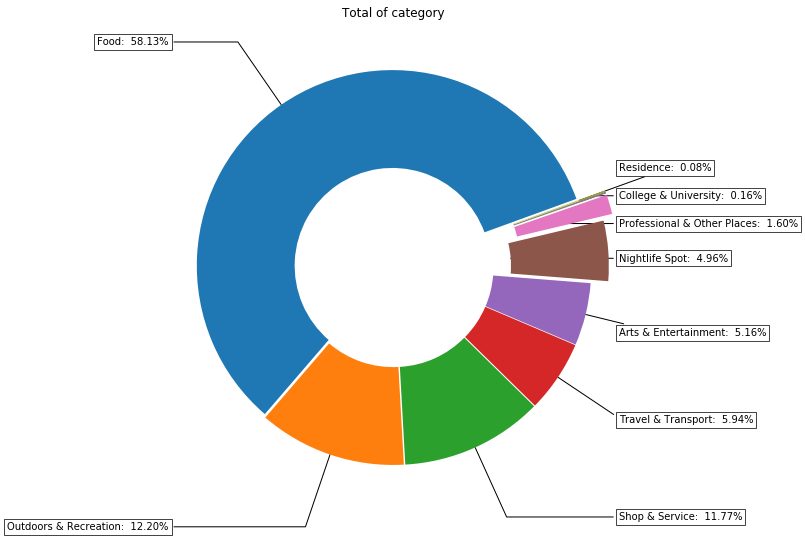

In [17]:
#  sum each category
df_total_category_query = df_count_category.groupby(['category']).sum()
df_total_category_query.sort_values(by='count',ascending=False,inplace = True)

df_total_category_query['Category'] = df_total_category_query.index

df_total_category_query.set_index([pd.Index([1,2,3,4,5,6,7,8,9])],inplace=True)

# Pie chart
labels  = df_total_category_query['Category'].tolist()

fig, ax = plt.subplots(figsize=(18, 9), subplot_kw=dict(aspect="equal"))

data = df_total_category_query['count'].tolist()
explode = [0.01,0.01,0.01,0.01,0.01,0.1,0.15,0.15,0.15]
data_sum = df_total_category_query['count'].sum()

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=20, explode = explode)
                    

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
i_y=1.4
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if i==5 :
        i_y = 0.6
    if i==6 :
        i_y = 0.8
    if i==7 :
        i_y = 1.1
    if i==8 :
        i_y = 1.5
    temp_str = labels[i]+": % 5.2f" %(data[i]/data_sum*100)+"%" #format(data[i]/data_sum*100,5.2%)
    #temp_str = labels[i]
    ax.annotate(temp_str, xy=(x, y), xytext=(1.15*np.sign(x), i_y*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Total of category")

plt.show()

Using Pie Chart Analyize Top Business Type for Every General Location in Singapore

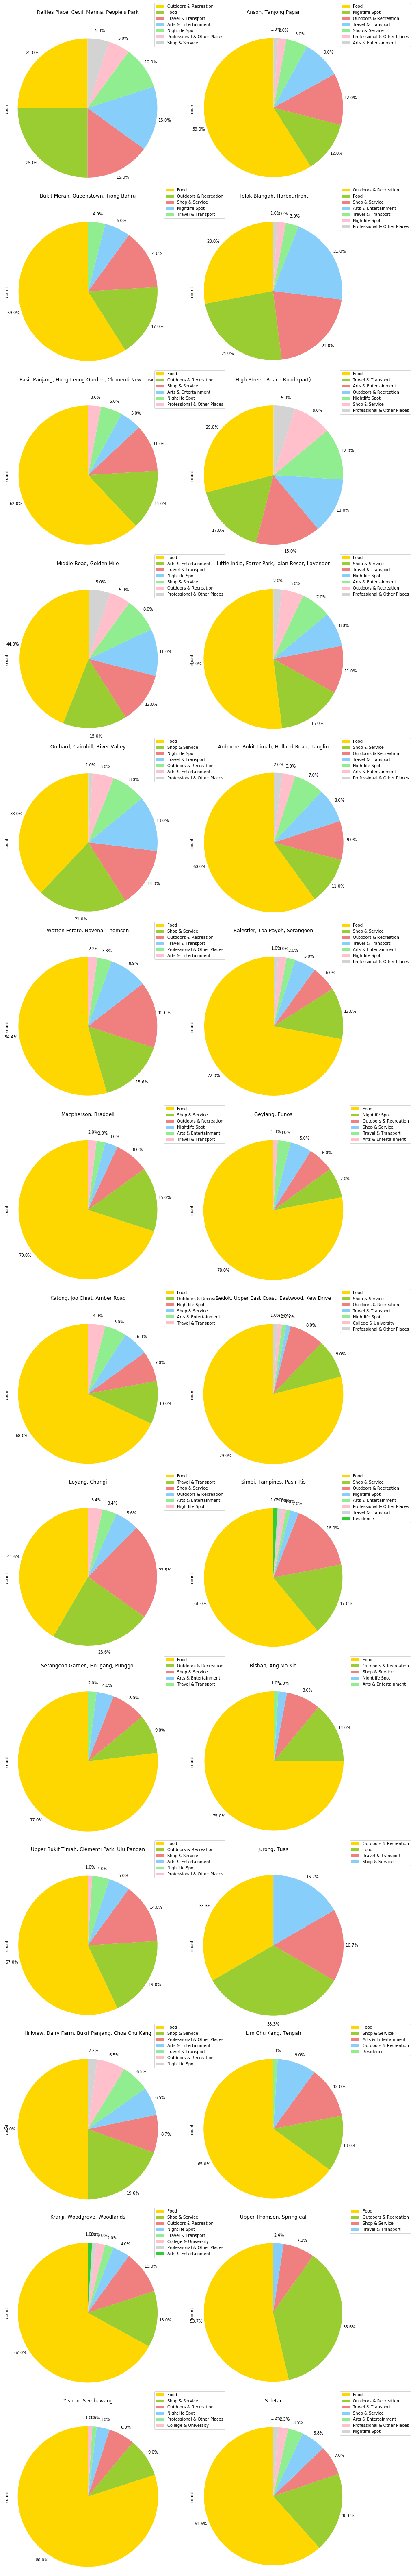

In [18]:

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','LIGHTGRAY','LIMEGREEN','MINTCREAM ']
#explode_list = [0.1, 0.05, 0.05, 0, 0, 0, 0] # ratio for each continent with which to offset each wedge.
fig = plt.figure() # create figure
fig_n =1
fig_l = int(len(Number_category)/2)
for location_key in Number_category :
    query_str = 'location == "'+location_key+'"'
    df_count_category_query = df_count_category.query(query_str).drop(['location'],axis=1)
    #df_count_category_query.Index(['count'])
    df_count_category_query.sort_values(by='count',ascending=False,inplace = True)
   # print(df_count_category_query)
    df_count_category_query['count'].plot(kind='pie',
                            figsize= (15,115),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            #shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list , # add custom colors
                            ax=fig.add_subplot(fig_l, 2, fig_n)
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

    # scale the title up by 10% to match pctdistance
    plt.title(location_key, y=1.10) 
    plt.axis('equal') 
    # add legend
    plt.legend(labels=df_count_category_query.category, loc='upper right',bbox_to_anchor=(1.4, 1.2))
    fig_n += 1
    #print(fig_n,fig_l)
    #if fig_n == 5 :
    #    break
plt.show()

Using Bar Graph Analyze Food, Outdoors & Recreation and Shop & Service for Postal District in Singapore

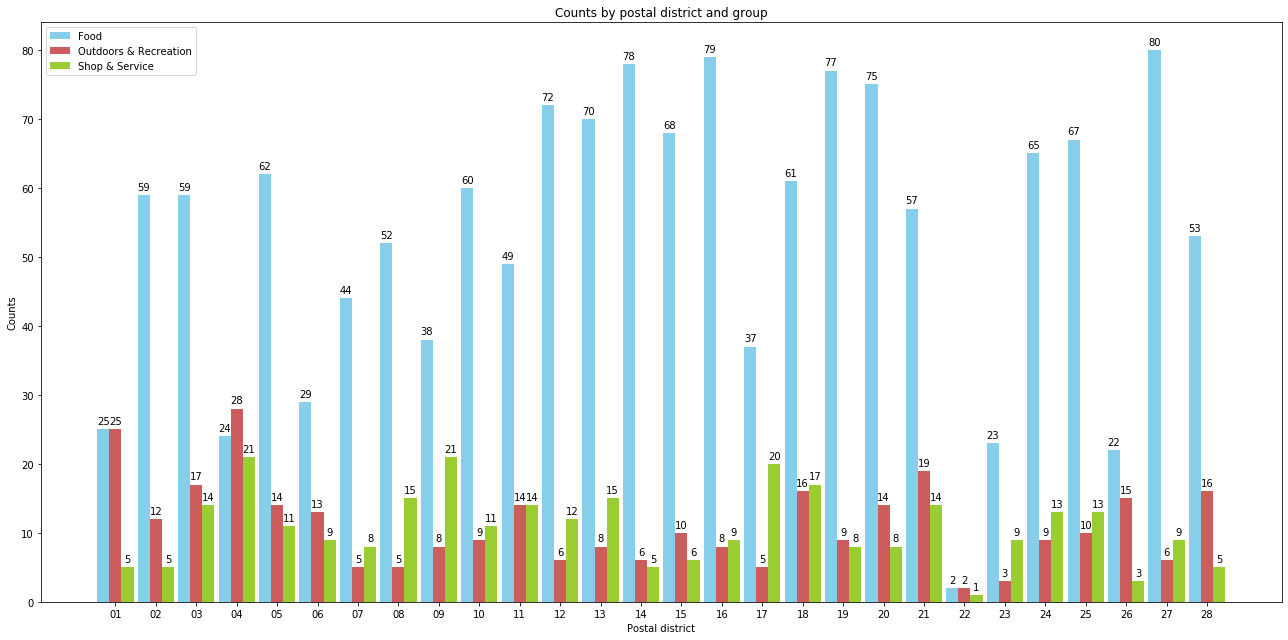

In [19]:

df_food_category = df_count_category.query("category == 'Food'")
food_count =  df_food_category['count'].tolist()
df_food_category = df_count_category.query("category == 'Outdoors & Recreation'")
outdoor_count =  df_food_category['count'].tolist()
df_food_category = df_count_category.query("category == 'Shop & Service'")
shop_count =  df_food_category['count'].tolist()
ind = np.arange(len(food_count))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(18,9))
rects1 = ax.bar(ind - width, food_count, width,  color='SkyBlue', label='Food')
rects2 = ax.bar(ind, outdoor_count, width,  color='IndianRed', label='Outdoors & Recreation')
rects3 = ax.bar(ind + width, shop_count, width,  color='yellowgreen', label='Shop & Service')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_xlabel('Postal district')
ax.set_title('Counts by postal district and group')
ax.set_xticks(ind)
ax.set_xticklabels(('01', '02', '03', '04', '05', '06', '07', '08', '09','10','11', '12', '13', '14', '15', '16', '17', '18', '19','20','21', '22', '23', '24', '25', '26', '27', '28'))
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()

Obtain the top 10 common businesses for each general place

In [20]:
# take the venue category information and create a dataframe with a one hot enconding of these data
singapore_onehot = pd.get_dummies(singapore_venues["Venue Category"],
                             prefix = "",
                             prefix_sep = "")

singapore_onehot["Location"] = singapore_venues["Location"]


nindex = list(singapore_onehot.columns).index("Location")
cols = deque(singapore_onehot.columns)
cols.rotate(-nindex)
cols = list(cols)
singapore_onehot = singapore_onehot[cols]

singapore_onehot.head()

Location  Accessories Store  Airport  \
0  Raffles Place, Cecil, Marina, People's Park                  0        0   
1  Raffles Place, Cecil, Marina, People's Park                  0        0   
2  Raffles Place, Cecil, Marina, People's Park                  0        0   
3  Raffles Place, Cecil, Marina, People's Park                  0        0   
4  Raffles Place, Cecil, Marina, People's Park                  0        0   

   Airport Food Court  Airport Lounge  Airport Service  American Restaurant  \
0                   0               0                0                    0   
1                   0               0                0                    0   
2                   0               0                0                    0   
3                   0               0                0                    0   
4                   0               0                0                    0   

   Aquarium  Arcade  Art Gallery  ...  Waterfall  Waterfront  Whisky Bar  \
0         0       0            0  ...          0           1           0   
1         0       0            0  ...          0           0           0   
2         0       0            0  ...          0           0           0   
3         0       0            0  ...          0           1           0   
4         0       0            0  ...          0           0           0   

   Wine Bar  Wine Shop  Wings Joint  Yoga Studio  Yunnan Restaurant  Zoo  \
0         0          0            0            0                  0    0   
1         0          0            0            0                  0    0   
2         0          0            0            0                  0    0   
3         0          0            0            0                  0    0   
4         0          0            0            0                  0    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 283 columns]

In [21]:
singapore_onehot.shape

(2558, 283)

In [22]:
#compute the average number of venue categories per location
singapore_grouped = singapore_onehot.groupby('Location').mean().reset_index()
singapore_grouped

Location  Accessories Store  \
0                                Anson, Tanjong Pagar           0.000000   
1         Ardmore, Bukit Timah, Holland Road, Tanglin           0.000000   
2                     Balestier, Toa Payoh, Serangoon           0.000000   
3        Bedok, Upper East Coast, Eastwood, Kew Drive           0.000000   
4                                  Bishan, Ang Mo Kio           0.000000   
5                Bukit Merah, Queenstown, Tiong Bahru           0.000000   
6                                      Geylang, Eunos           0.000000   
7                      High Street, Beach Road (part)           0.000000   
8   Hillview, Dairy Farm, Bukit Panjang, Choa Chu ...           0.000000   
9                                        Jurong, Tuas           0.000000   
10                      Katong, Joo Chiat, Amber Road           0.000000   
11                       Kranji, Woodgrove, Woodlands           0.000000   
12                               Lim Chu Kang, Tengah           0.000000   
13   Little India, Farrer Park, Jalan Besar, Lavender           0.000000   
14                                     Loyang, Changi           0.022472   
15                               Macpherson, Braddell           0.000000   
16                           Middle Road, Golden Mile           0.000000   
17                   Orchard, Cairnhill, River Valley           0.000000   
18  Pasir Panjang, Hong Leong Garden, Clementi New...           0.000000   
19        Raffles Place, Cecil, Marina, People's Park           0.000000   
20                                            Seletar           0.000000   
21                 Serangoon Garden, Hougang, Punggol           0.000000   
22                         Simei, Tampines, Pasir Ris           0.000000   
23                        Telok Blangah, Harbourfront           0.000000   
24       Upper Bukit Timah, Clementi Park, Ulu Pandan           0.000000   
25                          Upper Thomson, Springleaf           0.000000   
26                     Watten Estate, Novena, Thomson           0.000000   
27                                  Yishun, Sembawang           0.000000   

     Airport  Airport Food Court  Airport Lounge  Airport Service  \
0   0.000000            0.000000        0.000000         0.000000   
1   0.000000            0.000000        0.000000         0.000000   
2   0.000000            0.000000        0.000000         0.000000   
3   0.000000            0.000000        0.000000         0.000000   
4   0.000000            0.000000        0.000000         0.000000   
5   0.000000            0.000000        0.000000         0.000000   
6   0.000000            0.000000        0.000000         0.000000   
7   0.000000            0.000000        0.000000         0.000000   
8   0.000000            0.000000        0.000000         0.000000   
9   0.000000            0.000000        0.000000         0.000000   
10  0.000000            0.000000        0.000000         0.000000   
11  0.000000            0.000000        0.000000         0.000000   
12  0.000000            0.000000        0.000000         0.000000   
13  0.000000            0.000000        0.000000         0.000000   
14  0.022472            0.011236        0.078652         0.056180   
15  0.000000            0.000000        0.000000         0.000000   
16  0.000000            0.000000        0.000000         0.000000   
17  0.000000            0.000000        0.000000         0.000000   
18  0.000000            0.000000        0.000000         0.000000   
19  0.000000            0.000000        0.000000         0.000000   
20  0.011628            0.000000        0.000000         0.011628   
21  0.000000            0.000000        0.000000         0.000000   
22  0.000000            0.000000        0.000000         0.000000   
23  0.000000            0.000000        0.000000         0.000000   
24  0.000000            0.000000        0.000000         0.000000   
25  0.000000            0.000000        0.0000

In [23]:
#Make a function that is the N most frequent venues 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
#  Create the new dataframe and display the top 10 place for each location
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Place'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Place'.format(ind+1))

# create a new dataframe
Location_venues_sorted = pd.DataFrame(columns=columns)
Location_venues_sorted['Location'] = singapore_grouped['Location']

for ind in np.arange(singapore_grouped.shape[0]):
    Location_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

Location_venues_sorted

Location  \
0                                Anson, Tanjong Pagar   
1         Ardmore, Bukit Timah, Holland Road, Tanglin   
2                     Balestier, Toa Payoh, Serangoon   
3        Bedok, Upper East Coast, Eastwood, Kew Drive   
4                                  Bishan, Ang Mo Kio   
5                Bukit Merah, Queenstown, Tiong Bahru   
6                                      Geylang, Eunos   
7                      High Street, Beach Road (part)   
8   Hillview, Dairy Farm, Bukit Panjang, Choa Chu ...   
9                                        Jurong, Tuas   
10                      Katong, Joo Chiat, Amber Road   
11                       Kranji, Woodgrove, Woodlands   
12                               Lim Chu Kang, Tengah   
13   Little India, Farrer Park, Jalan Besar, Lavender   
14                                     Loyang, Changi   
15                               Macpherson, Braddell   
16                           Middle Road, Golden Mile   
17                   Orchard, Cairnhill, River Valley   
18  Pasir Panjang, Hong Leong Garden, Clementi New...   
19        Raffles Place, Cecil, Marina, People's Park   
20                                            Seletar   
21                 Serangoon Garden, Hougang, Punggol   
22                         Simei, Tampines, Pasir Ris   
23                        Telok Blangah, Harbourfront   
24       Upper Bukit Timah, Clementi Park, Ulu Pandan   
25                          Upper Thomson, Springleaf   
26                     Watten Estate, Novena, Thomson   
27                                  Yishun, Sembawang   

           1st Most Common Place 2nd Most Common Place 3rd Most Common Place  \
0                          Hotel   Japanese Restaurant           Coffee Shop   
1             Italian Restaurant                Bakery                 Hotel   
2             Chinese Restaurant     Indian Restaurant                  Café   
3             Chinese Restaurant      Asian Restaurant            Food Court   
4             Chinese Restaurant            Food Court           Coffee Shop   
5                           Café            Food Court                  Park   
6             Chinese Restaurant            Food Court           Coffee Shop   
7                          Hotel   Japanese Restaurant          Cocktail Bar   
8                     Food Court   Japanese Restaurant                  Café   
9               Asian Restaurant                Garden                  Farm   
10            Chinese Restaurant                 Hotel           Coffee Shop   
11                   Coffee Shop  Fast Food Restaurant           Supermarket   
12          Fast Food Restaurant           Coffee Shop   Japanese Restaurant   
13                         Hotel           Coffee Shop     Indian Restaurant   
14                Airport Lounge       Airport Service           Coffee Shop   
15            Chinese Restaurant            Food Court    Seafood Restaurant   
16                         Hotel           Coffee Shop   Japanese Restaurant   
17                         Hotel   Japanese Restaurant         Shopping Mall   
18                   Coffee Shop    Chinese Restaurant  Gym / Fitness Center   
19                         Hotel            Waterfront           Event Space   
20                   Coffee Shop                  Café            Playground   
21                    Food Court           Coffee Shop    Chinese Restaurant   
22                   Coffee Shop                  Park                Bakery   
23  Theme Park Ride / Attraction    Chinese Restaurant            Theme Park   
24                          Café          Soccer Field     Korean Restaurant   
25                          Lake    Chinese Restaurant     Indian Restaurant   
26                   Flower Shop    Italian Restaurant                  Café   
27                   Coffee Shop    Chinese Restaurant      Asian Restaurant   

   4th Most Common Place 5th Most Common Place 6th Most Common Place  

# Location clustering

Run *k*-means to cluster the location into 5 clusters.

In [25]:
# set number of clusters
kclusters = 5

singapore_grouped_clustering = singapore_grouped.drop('Location', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit( singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])
print(kmeans.labels_.shape)

[0 3 1 1 1 3 1 0 3 4]
(28,)


Create a dataframe that containes the location,coordinate and the cluster information, together with the top 10 venues

In [26]:
singapore_grouped["Cluster Labels"] = kmeans.labels_

# add clustering labels
singapore_combined = df.merge(singapore_grouped, left_on = "General location", right_on = "Location", how = "outer")

# merge singapore_grouped with toronto_data to add latitude/longitude for each Location
singapore_combined = singapore_combined.join(Location_venues_sorted.set_index('Location'), on='Location')

singapore_combined["Cluster Labels"] = singapore_combined["Cluster Labels"].fillna(5).astype("int")

singapore_combined.drop(['Location'], axis=1, inplace = True)
singapore_combined.head() # check the last columns!

Postal district           Postal sector  \
0              01  01, 02, 03, 04, 05, 06   
1              02                  07, 08   
2              03              14, 15, 16   
3              04                  09, 10   
4              05              11, 12, 13   

                                    General location  latitude   longitude  \
0        Raffles Place, Cecil, Marina, People's Park  1.281632  103.857248   
1                               Anson, Tanjong Pagar  1.272167  103.842780   
2               Bukit Merah, Queenstown, Tiong Bahru  1.286189  103.817772   
3                        Telok Blangah, Harbourfront  1.271282  103.817022   
4  Pasir Panjang, Hong Leong Garden, Clementi New...  1.295909  103.777698   

   Accessories Store  Airport  Airport Food Court  Airport Lounge  \
0                0.0      0.0                 0.0             0.0   
1                0.0      0.0                 0.0             0.0   
2                0.0      0.0                 0.0             0.0   
3                0.0      0.0                 0.0             0.0   
4                0.0      0.0                 0.0             0.0   

   Airport Service  ...         1st Most Common Place  2nd Most Common Place  \
0              0.0  ...                         Hotel             Waterfront   
1              0.0  ...                         Hotel    Japanese Restaurant   
2              0.0  ...                          Café             Food Court   
3              0.0  ...  Theme Park Ride / Attraction     Chinese Restaurant   
4              0.0  ...                   Coffee Shop     Chinese Restaurant   

   3rd Most Common Place  4th Most Common Place  5th Most Common Place  \
0            Event Space                 Garden     Seafood Restaurant   
1            Coffee Shop                   Café             Restaurant   
2                   Park    Japanese Restaurant         Ice Cream Shop   
3             Theme Park         Scenic Lookout                   Park   
4   Gym / Fitness Center       Asian Restaurant     Italian Restaurant   

   6th Most Common Place  7th Most Common Place  8th Most Common Place  \
0             Hotel Pool             Restaurant             Steakhouse   
1       Ramen Restaurant      Korean Restaurant                 Bakery   
2            Coffee Shop                  Hotel     Chinese Restaurant   
3                   Pool                  Beach                  Trail   
4    Japanese Restaurant         Sandwich Place      Indian Restaurant   

   9th Most Common Place  10th Most Common Place  
0         Scenic Lookout                  Buffet  
1   Gym / Fitness Center      Chinese Restaurant  
2                 Bakery               Bookstore  
3         Chocolate Shop               Multiplex  
4             Food Court                    Park  

[5 rows x 298 columns]

In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

kclusters = kclusters + 1

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(singapore_combined['latitude'],
                                  singapore_combined['longitude'],
                                  singapore_combined['General location'],
                                  singapore_combined['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Analyze clusters

In [28]:
#cluster 1
singapore_combined.loc[singapore_combined['Cluster Labels'] == 0, "1st Most Common Place":"10th Most Common Place"].head()

1st Most Common Place 2nd Most Common Place 3rd Most Common Place  \
0                 Hotel            Waterfront           Event Space   
1                 Hotel   Japanese Restaurant           Coffee Shop   
5                 Hotel   Japanese Restaurant          Cocktail Bar   
6                 Hotel           Coffee Shop   Japanese Restaurant   
7                 Hotel           Coffee Shop     Indian Restaurant   

  4th Most Common Place 5th Most Common Place 6th Most Common Place  \
0                Garden    Seafood Restaurant            Hotel Pool   
1                  Café            Restaurant      Ramen Restaurant   
5              Wine Bar            Waterfront           Event Space   
6           Event Space                  Café             Hotel Bar   
7        Ice Cream Shop    Chinese Restaurant       Thai Restaurant   

  7th Most Common Place 8th Most Common Place 9th Most Common Place  \
0            Restaurant            Steakhouse        Scenic Lookout   
1     Korean Restaurant                Bakery  Gym / Fitness Center   
5     French Restaurant                Buffet                 Plaza   
6        Ice Cream Shop     Indian Restaurant          Cocktail Bar   
7                  Café        Clothing Store   Japanese Restaurant   

  10th Most Common Place  
0                 Buffet  
1     Chinese Restaurant  
5  Performing Arts Venue  
6                 Buffet  
7           Dessert Shop

In [29]:
#cluster 2
singapore_combined.loc[singapore_combined['Cluster Labels'] == 1, "1st Most Common Place":"10th Most Common Place"].head()

1st Most Common Place 2nd Most Common Place 3rd Most Common Place  \
11    Chinese Restaurant     Indian Restaurant                  Café   
12    Chinese Restaurant            Food Court    Seafood Restaurant   
13    Chinese Restaurant            Food Court           Coffee Shop   
14    Chinese Restaurant                 Hotel           Coffee Shop   
15    Chinese Restaurant      Asian Restaurant            Food Court   

   4th Most Common Place 5th Most Common Place 6th Most Common Place  \
11            Food Court        Ice Cream Shop           Supermarket   
12           Coffee Shop      Asian Restaurant          Noodle House   
13      Asian Restaurant             BBQ Joint          Noodle House   
14             Multiplex            Food Court      Asian Restaurant   
15           Coffee Shop          Noodle House   Japanese Restaurant   

   7th Most Common Place  8th Most Common Place  \
11                 Hotel                 Bakery   
12                  Café            Supermarket   
13    Italian Restaurant                  Hotel   
14                Bakery  Vietnamese Restaurant   
15                  Café     Seafood Restaurant   

            9th Most Common Place 10th Most Common Place  
11                    Coffee Shop             Soup Place  
12  Vegetarian / Vegan Restaurant         Ice Cream Shop  
13             Seafood Restaurant  Vietnamese Restaurant  
14                      BBQ Joint     Italian Restaurant  
15                    Supermarket         Ice Cream Shop

In [30]:
#cluster 3
singapore_combined.loc[singapore_combined['Cluster Labels'] == 2, "1st Most Common Place":"10th Most Common Place"].head()

1st Most Common Place 2nd Most Common Place 3rd Most Common Place  \
16        Airport Lounge       Airport Service           Coffee Shop   
17           Coffee Shop                  Park                Bakery   
23  Fast Food Restaurant           Coffee Shop   Japanese Restaurant   
24           Coffee Shop  Fast Food Restaurant           Supermarket   
27           Coffee Shop                  Café            Playground   

   4th Most Common Place 5th Most Common Place 6th Most Common Place  \
16  Fast Food Restaurant                Garden           Candy Store   
17  Fast Food Restaurant                  Café                   Gym   
23            Food Court      Asian Restaurant    Chinese Restaurant   
24            Food Court      Asian Restaurant                  Park   
27            Restaurant            Food Court  Fast Food Restaurant   

   7th Most Common Place   8th Most Common Place 9th Most Common Place  \
16        Sandwich Place                  Bakery              Boutique   
17           Supermarket  Furniture / Home Store       Thai Restaurant   
23           Supermarket           Grocery Store               Exhibit   
24         Shopping Mall          Sandwich Place                  Café   
27       Thai Restaurant        Asian Restaurant                 Trail   

   10th Most Common Place  
16         Clothing Store  
17          Shopping Mall  
23         Sandwich Place  
24     Italian Restaurant  
27     Chinese Restaurant

In [31]:
#cluster 4
singapore_combined.loc[singapore_combined['Cluster Labels'] == 3, "1st Most Common Place":"10th Most Common Place"].head()

1st Most Common Place 2nd Most Common Place 3rd Most Common Place  \
2                           Café            Food Court                  Park   
3   Theme Park Ride / Attraction    Chinese Restaurant            Theme Park   
4                    Coffee Shop    Chinese Restaurant  Gym / Fitness Center   
9             Italian Restaurant                Bakery                 Hotel   
10                   Flower Shop    Italian Restaurant                  Café   

   4th Most Common Place 5th Most Common Place 6th Most Common Place  \
2    Japanese Restaurant        Ice Cream Shop           Coffee Shop   
3         Scenic Lookout                  Park                  Pool   
4       Asian Restaurant    Italian Restaurant   Japanese Restaurant   
9                 Garden           Pizza Place    Chinese Restaurant   
10                 Trail    Chinese Restaurant                Bakery   

   7th Most Common Place 8th Most Common Place 9th Most Common Place  \
2                  Hotel    Chinese Restaurant                Bakery   
3                  Beach                 Trail        Chocolate Shop   
4         Sandwich Place     Indian Restaurant            Food Court   
9      French Restaurant   Japanese Restaurant                   Bar   
10   Japanese Restaurant                Garden    Spanish Restaurant   

   10th Most Common Place  
2               Bookstore  
3               Multiplex  
4                    Park  
9          Ice Cream Shop  
10      French Restaurant

In [32]:
#cluster 5
singapore_combined.loc[singapore_combined['Cluster Labels'] == 4, "1st Most Common Place":"10th Most Common Place"].head()

1st Most Common Place 2nd Most Common Place 3rd Most Common Place  \
21      Asian Restaurant                Garden                  Farm   

   4th Most Common Place 5th Most Common Place 6th Most Common Place  \
21        Clothing Store                  Road                  Food   

   7th Most Common Place 8th Most Common Place 9th Most Common Place  \
21     Fish & Chips Shop          Fishing Spot           Flea Market   

   10th Most Common Place  
21            Flower Shop

# Private Residential Property Prices for Singapore:

Obtain Private Residential Property Prices Data from 1975 1Q to 2019 4Q

In [33]:
# create the dataframe from  the csv file 
df_property = pd.read_csv('Private Residential Property Prices.csv',
                       skiprows=range(4),
                       skipfooter=13)
df_property

C:\Users\GUOCHENGGUANG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


Variables    1975 1Q    1975 2Q    1975 3Q    1975 4Q   \
0   Residential Properties         8.9        9.1        9.1        9.1   
1                   Landed         7.4        7.7        7.8        7.9   
2               Non-landed        10.5       11.2       11.5       11.5   

    1976 1Q    1976 2Q    1976 3Q    1976 4Q    1977 1Q   ...   2017 4Q   \
0        9.5        9.5        9.8        9.5        9.5  ...      138.7   
1        7.9        8.0        8.0        8.0        7.9  ...      152.9   
2       11.5       11.7       11.7       11.5       11.5  ...      135.6   

    2018 1Q    2018 2Q    2018 3Q    2018 4Q    2019 1Q    2019 2Q   \
0      144.1      149.0      149.7      149.6      148.6      150.8   
1      155.8      162.2      165.9      162.6      164.4      164.2   
2      141.6      146.1      146.1      146.8      145.2      148.1   

    2019 3Q    2019 4Q   Unnamed: 181  
0      152.8      153.6           NaN  
1      165.8      171.8           NaN  
2      150.0      149.6           NaN  

[3 rows x 182 columns]

In [34]:
# delete useless column
df_property.drop(['Unnamed: 181'],axis = 1,inplace =True)
df_property

Variables    1975 1Q    1975 2Q    1975 3Q    1975 4Q   \
0   Residential Properties         8.9        9.1        9.1        9.1   
1                   Landed         7.4        7.7        7.8        7.9   
2               Non-landed        10.5       11.2       11.5       11.5   

    1976 1Q    1976 2Q    1976 3Q    1976 4Q    1977 1Q   ...   2017 3Q   \
0        9.5        9.5        9.8        9.5        9.5  ...      137.6   
1        7.9        8.0        8.0        8.0        7.9  ...      152.1   
2       11.5       11.7       11.7       11.5       11.5  ...      134.5   

    2017 4Q    2018 1Q    2018 2Q    2018 3Q    2018 4Q    2019 1Q   \
0      138.7      144.1      149.0      149.7      149.6      148.6   
1      152.9      155.8      162.2      165.9      162.6      164.4   
2      135.6      141.6      146.1      146.1      146.8      145.2   

    2019 2Q    2019 3Q    2019 4Q   
0      150.8      152.8      153.6  
1      164.2      165.8      171.8  
2      148.1      150.0      149.6  

[3 rows x 181 columns]

In [35]:
#reset the index
df_property.set_index(' Variables ',inplace = True)
df_property

1975 1Q    1975 2Q    1975 3Q    1975 4Q   \
 Variables                                                             
 Residential Properties         8.9        9.1        9.1        9.1   
     Landed                     7.4        7.7        7.8        7.9   
     Non-landed                10.5       11.2       11.5       11.5   

                           1976 1Q    1976 2Q    1976 3Q    1976 4Q   \
 Variables                                                             
 Residential Properties         9.5        9.5        9.8        9.5   
     Landed                     7.9        8.0        8.0        8.0   
     Non-landed                11.5       11.7       11.7       11.5   

                           1977 1Q    1977 2Q   ...   2017 3Q    2017 4Q   \
 Variables                                      ...                         
 Residential Properties         9.5        9.5  ...      137.6      138.7   
     Landed                     7.9        7.9  ...      152.1      152.9   
     Non-landed                11.5       11.5  ...      134.5      135.6   

                           2018 1Q    2018 2Q    2018 3Q    2018 4Q   \
 Variables                                                             
 Residential Properties       144.1      149.0      149.7      149.6   
     Landed                   155.8      162.2      165.9      162.6   
     Non-landed               141.6      146.1      146.1      146.8   

                           2019 1Q    2019 2Q    2019 3Q    2019 4Q   
 Variables                                                            
 Residential Properties       148.6      150.8      152.8      153.6  
     Landed                   164.4      164.2      165.8      171.8  
     Non-landed               145.2      148.1      150.0      149.6  

[3 rows x 180 columns]

Exchange data from columns to rows

In [36]:
df_property_t = df_property.transpose()
df_property_t['date']= df_property_t.index.str.replace(" ","",regex = True)
df_property_t['date'] = df_property_t['date'].str.strip("Q").map(int)
#df_property_t.columns

Using Line Chart Analyze Private Residential Property Prices for Singapore from 1975 Q1 -- 2019 Q4

([<matplotlib.axis.XTick at 0x1a3a2b36088>,
 <a list of 5 Text xticklabel objects>)

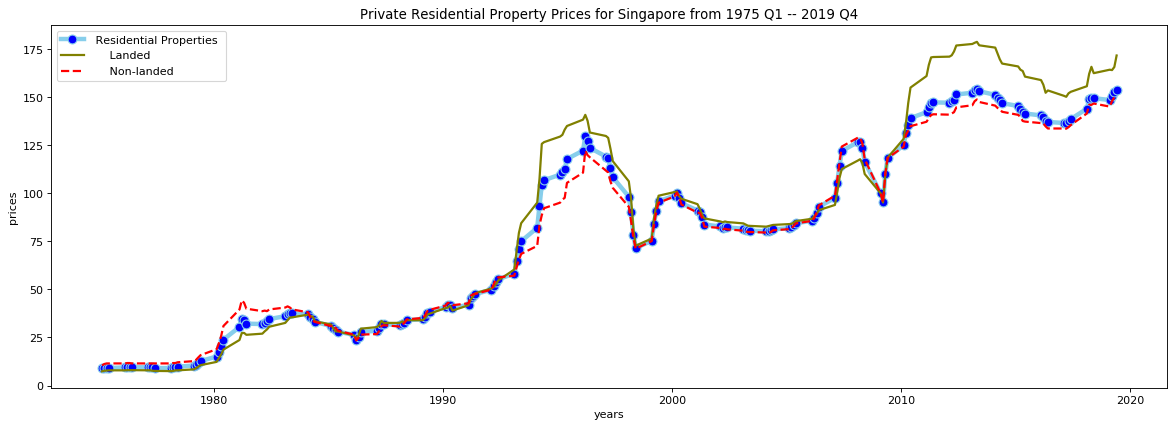

In [40]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot( 'date', ' Residential Properties ', data=df_property_t, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.plot( 'date', '     Landed ', data=df_property_t, marker='', color='olive', linewidth=2)
plt.plot( 'date', '     Non-landed ', data=df_property_t, color='red', linewidth=2, linestyle='dashed')

# Add plot details
plt.title('Private Residential Property Prices for Singapore from 1975 Q1 -- 2019 Q4')
plt.xlabel('years')
plt.ylabel('prices')
plt.legend()
plt.xticks((19800,19900,20000,20100,20200), ['1980','1990','2000','2010','2020'])

# Analyze Private Property For New Sale in Singapore

Create the dataframe from multiple csv files

In [5]:
name_str = 'private property_01.csv'
df_pp = pd.read_csv(name_str, skiprows = 2)
df_pp.drop(['S/N','Project Name','Street Name','Tenure','Type of Sale','No. of Units','Nett Price ($)'],axis=1,inplace = True)
df_pp.drop(df_pp.tail(14).index,inplace = True)
for i in range(5) :
    name_str = 'private property_0'+str(i+2)+'.csv'
    df_pp_1 = pd.read_csv(name_str, skiprows = 2)
    df_pp_1.drop(['S/N','Project Name','Street Name','Tenure','Type of Sale','No. of Units','Nett Price ($)'],axis=1,inplace = True)
    if i == 4 :
        df_pp_1.drop(df_pp_1.tail(17).index,inplace = True)
        df_pp_1['Postal District'] = df_pp_1['Postal District'].astype('int32',copy=False)
        df_pp_1['Postal District'] = df_pp_1['Postal District'].astype('str',copy=False)
    else:
        df_pp_1.drop(df_pp_1.tail(14).index,inplace = True)
    df_pp = df_pp.append(df_pp_1,ignore_index=True)
df_pp

Type Postal District Market Segment  Price ($)  Area (Sqft)  \
0        Apartment              05            OCR  1353000.0        829.0   
1        Apartment              03            RCR  1215000.0        635.0   
2        Apartment              05            OCR  1165220.0        764.0   
3        Apartment              03            RCR  1148000.0        527.0   
4        Apartment              03            RCR   955000.0        506.0   
...            ...             ...            ...        ...          ...   
26684  Condominium              27            OCR   805000.0        786.0   
26685  Condominium              27            OCR  1079000.0       1023.0   
26686  Condominium              27            OCR   753000.0        689.0   
26687    Apartment              27            OCR   951300.0        700.0   
26688    Apartment              27            OCR   988112.0        969.0   

      Type of Area Floor Level  Unit Price ($psf) Date of Sale  
0           Strata    11 to 15             1632.0     Mar-2020  
1           Strata    31 to 35             1913.0     Mar-2020  
2           Strata    26 to 30             1525.0     Mar-2020  
3           Strata    21 to 25             2177.0     Mar-2020  
4           Strata    01 to 05             1888.0     Mar-2020  
...            ...         ...                ...          ...  
26684       Strata    01 to 05             1024.0     Mar-2017  
26685       Strata    06 to 10             1055.0     Mar-2017  
26686       Strata    11 to 15             1093.0     Mar-2017  
26687       Strata    06 to 10             1360.0     Mar-2017  
26688       Strata    06 to 10             1020.0     Mar-2017  

[26689 rows x 9 columns]

Using 3D Point Plot Analyze Private Residential Property Unit Prices for Singapore

In [42]:
#create a new dataframe groupby multi index
df_pd= df_pp.groupby(['Postal District','Floor Level']).sum()

# reset index to bring the Year in as a column
df_pd.reset_index(inplace=True)
# change column type
df_pd['Postal District'] = df_pd['Postal District'].astype('int32')
# change column value
df_pd = df_pd.replace({'Floor Level':{'01 to 05':1,'06 to 10':2,'11 to 15':3,'16 to 20':4,'21 to 25':5,
                                      '26 to 30':6,'31 to 35':7,'36 to 40':8,'41 to 45':9,'46 to 50':10,
                                      '51 to 55':11,'56 to 60':12}})
df_pd['Floor Level'] = df_pd['Floor Level'].astype('int32')
df_pd.head()

Postal District  Floor Level    Price ($)  Area (Sqft)  Unit Price ($psf)
0                1            1   77960640.0      33628.0            58455.0
1                1            2  207419372.0      86891.0           157808.0
2                1            3  181214163.0      74435.0           126143.0
3                1            4  131798335.0      50992.0            89446.0
4                1            5  104267908.0      39162.0            80764.0

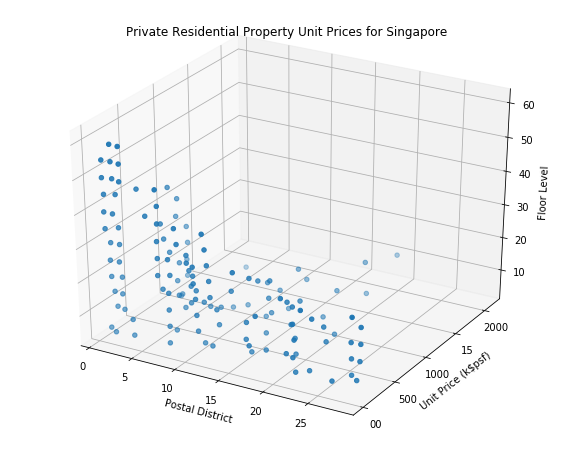

In [43]:
# create 3d scatter graph
ax3d = plt.figure(figsize=(10,8)).gca(projection='3d')
ax3d.scatter(df_pd['Postal District'], df_pd['Unit Price ($psf)'], df_pd['Floor Level'])
ax3d.set_xlabel('Postal District')
ax3d.set_ylabel('Unit Price (k$psf)')
ax3d.set_zlabel('Floor Level')
ax3d.set_yticklabels( ['0','00','500','1000','1500','2000'], fontdict=None, minor=False)
ax3d.set_zticklabels( ['0','10','20','30','40','50','60'])
ax3d.set_title('Private Residential Property Unit Prices for Singapore', color='black')
plt.show()

Using 3D Bar Analyze Private Residential Property Sale Area for Singapore

<Figure size 432x288 with 0 Axes>

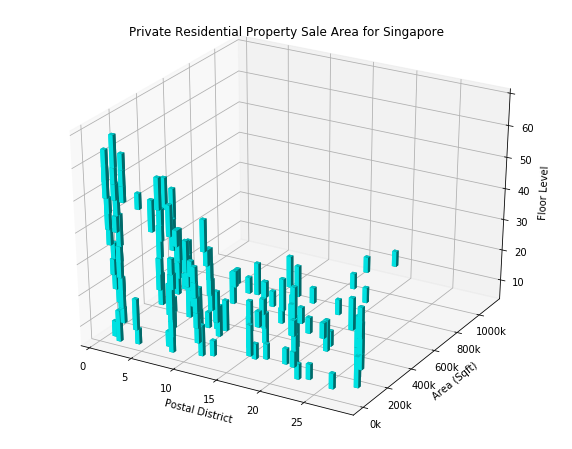

In [45]:

fig = plt.figure()
ax3d_bar = plt.figure(figsize=(10,8)).gca(projection='3d')
#ax = plt.axes(projection="3d")

num_bars = 141
x_size = np.ones(num_bars)/2
y_size = np.ones(num_bars)*20
#z_size = df_pd['Floor Level'] 
z_size = np.random.randint(1,3, size=num_bars)

ax3d_bar.bar3d(df_pd['Postal District'],df_pd['Area (Sqft)']/1000, df_pd['Floor Level'], x_size, y_size, z_size, color='aqua',shade = True)
ax3d_bar.set_xlabel('Postal District')
ax3d_bar.set_ylabel('Area (Sqft)')
ax3d_bar.set_zlabel('Floor Level')
ax3d_bar.set_yticklabels( ['0','0k','200k','400k','600k','800k','1000k'], fontdict=None, minor=False)
ax3d_bar.set_zticklabels( ['0','10','20','30','40','50','60'])
ax3d_bar.set_title('Private Residential Property Sale Area for Singapore', color='black')

plt.show()

In [46]:
df_pp.describe()  #  basic statistical details like percentile, mean, std etc.

Price ($)   Area (Sqft)  Unit Price ($psf)
count  2.668900e+04  26689.000000       26689.000000
mean   1.400494e+06    826.610626        1693.392709
std    8.690666e+05    334.224081         445.102523
min    5.400000e+05    398.000000         750.000000
25%    9.630000e+05    603.000000        1385.000000
50%    1.246700e+06    743.000000        1617.000000
75%    1.594000e+06   1001.000000        1840.000000
max    3.100000e+07   6469.000000        5125.000000

Using Box Plot Analyze Private Residential Property Total Prices by Postal District for Singapore

<Figure size 432x288 with 0 Axes>

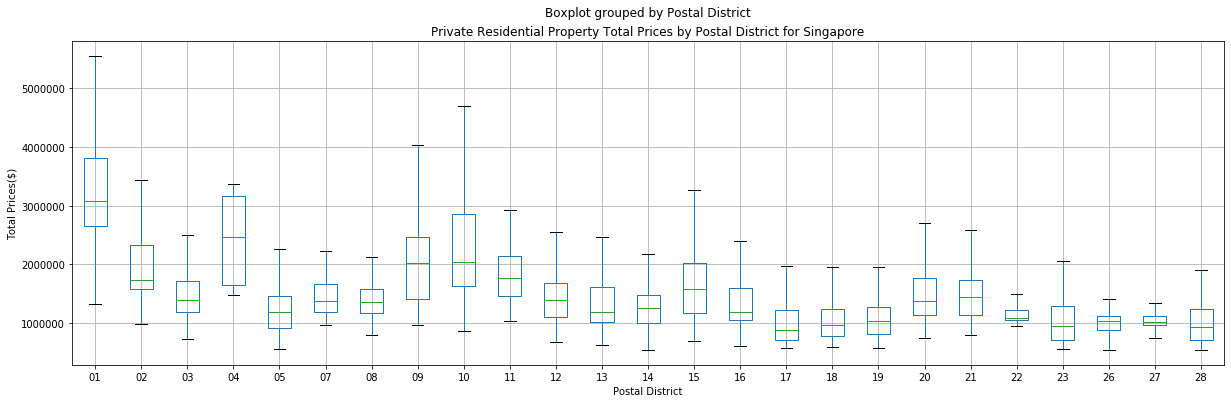

In [47]:
ax1 = plt.figure()
ax1 = df_pp.boxplot(column = ['Price ($)'],by='Postal District',sym='',figsize=(20,6))
ax1.set_ylabel('Total Prices($)')
ax1.set_title('Private Residential Property Total Prices by Postal District for Singapore', color='black')
plt.show()

Change column type from datetime to int32

In [48]:
df_pp_1 = df_pp.copy()

df_pp_1['Date of Sale'] = pd.to_datetime(df_pp_1['Date of Sale'], format="%b-%Y")

df_pp_1['Date of Sale'] = df_pp_1['Date of Sale'].astype(str)

df_pp_1['Date of Sale']= df_pp_1['Date of Sale'].str.replace("-","",regex = True)
df_pp_1['Date of Sale'] = df_pp_1['Date of Sale'].astype("int32")
df_pp_1['Date of Sale'] = df_pp_1['Date of Sale']/100
df_pp_1['Date of Sale'] = df_pp_1['Date of Sale'].astype("int32")

df_pp_1

Type Postal District Market Segment  Price ($)  Area (Sqft)  \
0        Apartment              05            OCR  1353000.0        829.0   
1        Apartment              03            RCR  1215000.0        635.0   
2        Apartment              05            OCR  1165220.0        764.0   
3        Apartment              03            RCR  1148000.0        527.0   
4        Apartment              03            RCR   955000.0        506.0   
...            ...             ...            ...        ...          ...   
26684  Condominium              27            OCR   805000.0        786.0   
26685  Condominium              27            OCR  1079000.0       1023.0   
26686  Condominium              27            OCR   753000.0        689.0   
26687    Apartment              27            OCR   951300.0        700.0   
26688    Apartment              27            OCR   988112.0        969.0   

      Type of Area Floor Level  Unit Price ($psf)  Date of Sale  
0           Strata    11 to 15             1632.0        202003  
1           Strata    31 to 35             1913.0        202003  
2           Strata    26 to 30             1525.0        202003  
3           Strata    21 to 25             2177.0        202003  
4           Strata    01 to 05             1888.0        202003  
...            ...         ...                ...           ...  
26684       Strata    01 to 05             1024.0        201703  
26685       Strata    06 to 10             1055.0        201703  
26686       Strata    11 to 15             1093.0        201703  
26687       Strata    06 to 10             1360.0        201703  
26688       Strata    06 to 10             1020.0        201703  

[26689 rows x 9 columns]

Summary group by selling date for Market Segment

In [49]:
# create Outside Central Region(OCR) data
df_ocr = df_pp_1[df_pp_1['Market Segment']=='OCR'].groupby(['Date of Sale']).sum()
df_ocr.head()

Price ($)  Area (Sqft)  Unit Price ($psf)
Date of Sale                                              
201703        1.954616e+08     157648.0           228345.0
201704        1.041200e+09     708561.0          1191789.0
201705        5.203667e+08     420141.0           570085.0
201706        3.977905e+08     328981.0           407956.0
201707        4.545301e+08     368438.0           504946.0

In [50]:
# create Core Central Region (CCR) Data
df_ccr = df_pp_1[df_pp_1['Market Segment']=='CCR'].groupby(['Date of Sale']).sum()
df_ccr.head()

Price ($)  Area (Sqft)  Unit Price ($psf)
Date of Sale                                             
201703         39473603.0      18838.0            45860.0
201704         65723126.0      30094.0            65651.0
201705         99639058.0      45400.0           106460.0
201706         88366535.0      41023.0           104967.0
201707        375478383.0     170026.0           367456.0

In [51]:
# create Rest of Central Region (RCR) Data
df_rcr = df_pp_1[df_pp_1['Market Segment']=='RCR'].groupby(['Date of Sale']).sum()
df_rcr.head()

Price ($)  Area (Sqft)  Unit Price ($psf)
Date of Sale                                             
201703        424949432.0     250548.0           605717.0
201704        698491149.0     427443.0           854697.0
201705        426935463.0     261866.0           510447.0
201706        382640593.0     229917.0           472730.0
201707        407609720.0     245059.0           501873.0

In [52]:
# combine the CCR, RCR and OCR data
df_merge = pd.merge(df_ccr, df_rcr,on='Date of Sale', how='left',suffixes=('_CCR', '_RCR'))
df_merge= pd.merge(df_merge, df_ocr,on='Date of Sale', how='left')
#df_merge = pd.concat(df_list)
df_merge.head()

Price ($)_CCR  Area (Sqft)_CCR  Unit Price ($psf)_CCR  \
Date of Sale                                                          
201703           39473603.0          18838.0                45860.0   
201704           65723126.0          30094.0                65651.0   
201705           99639058.0          45400.0               106460.0   
201706           88366535.0          41023.0               104967.0   
201707          375478383.0         170026.0               367456.0   

              Price ($)_RCR  Area (Sqft)_RCR  Unit Price ($psf)_RCR  \
Date of Sale                                                          
201703          424949432.0         250548.0               605717.0   
201704          698491149.0         427443.0               854697.0   
201705          426935463.0         261866.0               510447.0   
201706          382640593.0         229917.0               472730.0   
201707          407609720.0         245059.0               501873.0   

                 Price ($)  Area (Sqft)  Unit Price ($psf)  
Date of Sale                                                
201703        1.954616e+08     157648.0           228345.0  
201704        1.041200e+09     708561.0          1191789.0  
201705        5.203667e+08     420141.0           570085.0  
201706        3.977905e+08     328981.0           407956.0  
201707        4.545301e+08     368438.0           504946.0

Using Scatter Graph Compare Total Sale Prices of Private Property by Market Segment in Singapore from Mar-2017 to Mar-2020

In [53]:
# create the dataframe for total sale prices of private property by Market Segment
df_price = pd.DataFrame(df_merge,columns=['Price ($)_CCR','Price ($)_RCR','Price ($)'])
df_price.rename(columns={'Price ($)':'Price ($)_OCR'},inplace=True)
df_price.head()

Price ($)_CCR  Price ($)_RCR  Price ($)_OCR
Date of Sale                                             
201703           39473603.0    424949432.0   1.954616e+08
201704           65723126.0    698491149.0   1.041200e+09
201705           99639058.0    426935463.0   5.203667e+08
201706           88366535.0    382640593.0   3.977905e+08
201707          375478383.0    407609720.0   4.545301e+08

In [54]:
# reset index to bring the Year in as a column
df_price.reset_index(inplace=True)

df_price.head()

Date of Sale  Price ($)_CCR  Price ($)_RCR  Price ($)_OCR
0        201703     39473603.0    424949432.0   1.954616e+08
1        201704     65723126.0    698491149.0   1.041200e+09
2        201705     99639058.0    426935463.0   5.203667e+08
3        201706     88366535.0    382640593.0   3.977905e+08
4        201707    375478383.0    407609720.0   4.545301e+08

In [55]:
# cast the Years (the index) to type int
df_price.index = map(int, df_price.index)

# let's label the index. This will automatically be the column name when we reset the index
df_price.index.name = 'Order'

# reset index to bring the Year in as a column
df_price.reset_index(inplace=True)
df_price.head()

Order  Date of Sale  Price ($)_CCR  Price ($)_RCR  Price ($)_OCR
0      0        201703     39473603.0    424949432.0   1.954616e+08
1      1        201704     65723126.0    698491149.0   1.041200e+09
2      2        201705     99639058.0    426935463.0   5.203667e+08
3      3        201706     88366535.0    382640593.0   3.977905e+08
4      4        201707    375478383.0    407609720.0   4.545301e+08

In [56]:
# normalize OCR data
norm_ocr = (df_price['Price ($)_OCR'] - df_price['Price ($)_OCR'].min()) / (df_price['Price ($)_OCR'].max() - df_price['Price ($)_OCR'].min())

# normalize RCR data
norm_rcr = (df_price['Price ($)_RCR'] - df_price['Price ($)_RCR'].min()) / (df_price['Price ($)_RCR'].max() - df_price['Price ($)_RCR'].min())

# normalize CCR data
norm_ccr = (df_price['Price ($)_CCR'] - df_price['Price ($)_CCR'].min()) / (df_price['Price ($)_CCR'].max() - df_price['Price ($)_CCR'].min())

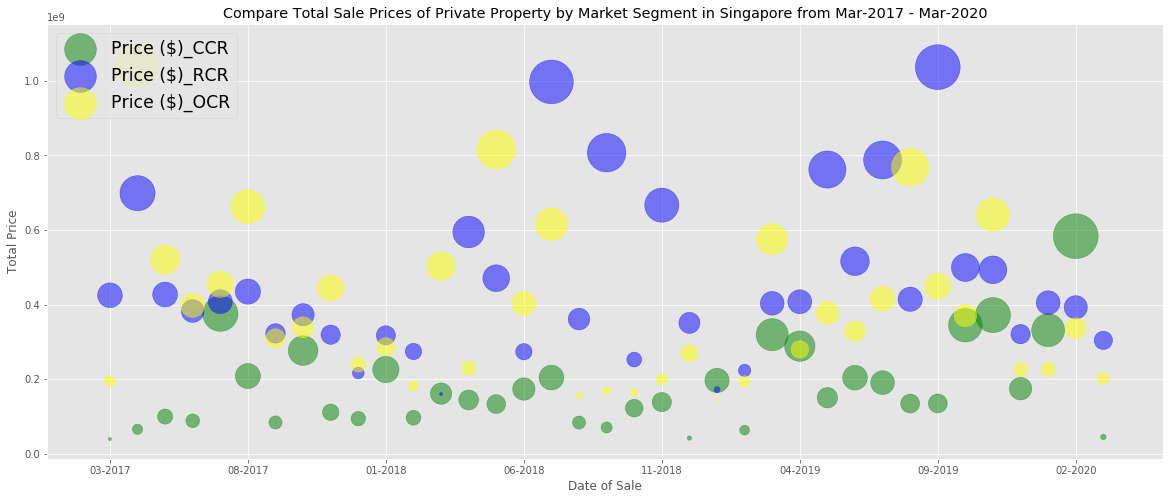

In [57]:
# make  the scatter plot about total sale prices
#set background style
plt.style.use('ggplot')
fig, axs = plt.subplots(figsize=(20,8))
# Price ($)_OCR
ax0 = df_price.plot(kind='scatter',
                    x='Order',
                    y='Price ($)_CCR',                    
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_ccr * 2000 + 10,  # pass in weights 
                    ax = axs
                   )

# Price ($)_RCR
ax1 = df_price.plot(kind='scatter',
                    x='Order',
                    y='Price ($)_RCR',
                    alpha=0.5,
                    color="blue",
                    s=norm_rcr * 2000 + 10,
                    ax = ax0
                   )

# Price ($)_OCR
ax2 = df_price.plot(kind='scatter',
                    x='Order',
                    y='Price ($)_OCR',
                    alpha=0.5,
                    color="yellow",
                    s=norm_ocr * 2000 + 10,
                    ax = ax0
                   )

axs.set_ylabel('Total Price')
axs.set_xlabel('Date of Sale')
axs.set_xticklabels( ['','03-2017','08-2017','01-2018','06-2018','11-2018','04-2019','09-2019','02-2020'], fontdict=None, minor=False)
axs.set_title('Compare Total Sale Prices of Private Property by Market Segment in Singapore from Mar-2017 - Mar-2020',color = 'black')
axs.legend(['Price ($)_CCR', 'Price ($)_RCR','Price ($)_OCR'], loc='upper left', fontsize='xx-large')
plt.show()

Using Bar Chart Compare Total Sale Area of Private Property by Market Segment in Singapore from Mar-2017 to Mar-2020

In [58]:
# create dataframe about selling Area 
df_area = pd.DataFrame(df_merge,columns=['Area (Sqft)_CCR','Area (Sqft)_RCR','Area (Sqft)'])
df_area.rename(columns={'Area (Sqft)':'Area (Sqft)_OCR'},inplace=True)
df_area.reset_index(inplace = True)
df_area.head()

Date of Sale  Area (Sqft)_CCR  Area (Sqft)_RCR  Area (Sqft)_OCR
0        201703          18838.0         250548.0         157648.0
1        201704          30094.0         427443.0         708561.0
2        201705          45400.0         261866.0         420141.0
3        201706          41023.0         229917.0         328981.0
4        201707         170026.0         245059.0         368438.0

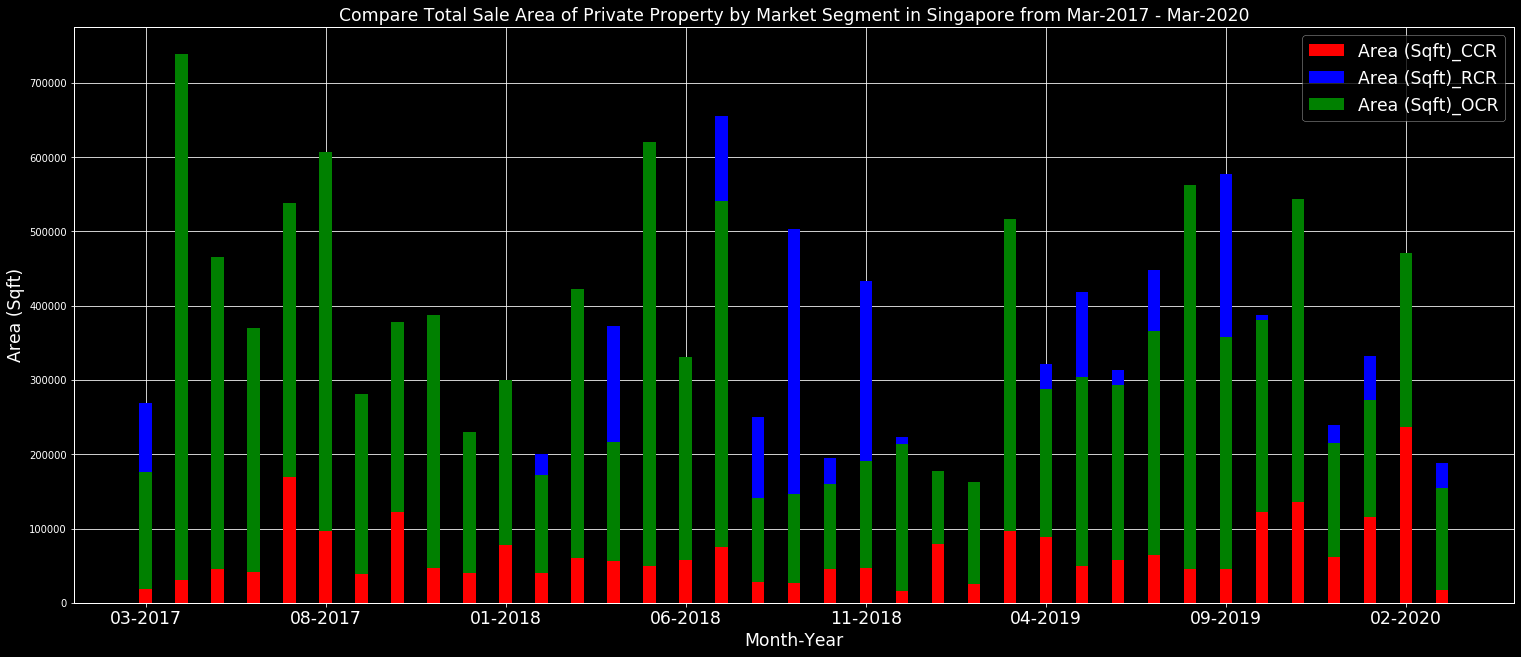

In [59]:
# make the bar chart for comparing total sale area
plt.style.use('dark_background')
N = 37
area_ccr = df_area['Area (Sqft)_CCR']
area_rcr = df_area['Area (Sqft)_RCR']
area_ocr = df_area['Area (Sqft)_OCR']
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, area_ccr, width, color='r')
ax.bar(ind, area_rcr, width,bottom=area_ccr, color='b')
ax.bar(ind, area_ocr, width,bottom=area_ccr, color='g')
ax.set_xlabel('Month-Year',fontsize = 'xx-large')
ax.set_ylabel('Area (Sqft)',fontsize = 'xx-large')

ax.set_xticklabels( ['','03-2017','08-2017','01-2018','06-2018','11-2018','04-2019','09-2019','02-2020'], fontdict=None, minor=False,fontsize = 'xx-large')
ax.set_title('Compare Total Sale Area of Private Property by Market Segment in Singapore from Mar-2017 - Mar-2020',fontsize = 'xx-large')
ax.legend(labels=['Area (Sqft)_CCR', 'Area (Sqft)_RCR','Area (Sqft)_OCR'],fontsize = 'xx-large')
plt.show()

Using 3D Surface Plot Analyze Mean of Unit Price of Private Property for Singapore from Mar-2017 to Mar-2020

In [60]:
# create dataframe for the unit price
df_up = pd.DataFrame(df_pp_1,columns=['Market Segment','Date of Sale','Unit Price ($psf)'])
df_up = df_up.groupby(['Market Segment','Date of Sale']).agg({'Unit Price ($psf)':['mean']})
df_up.columns = ['Mean of Unit Price ($psf)']
df_up.reset_index(inplace = True)
df_up['Mean of Unit Price ($psf)'] = df_up['Mean of Unit Price ($psf)'].astype('int32')
df_up = df_up.replace({'Market Segment':{'CCR':1,'RCR':2,'OCR':3}})
df_up = df_up.replace({'Date of Sale':{201703:1,201704:2,201705:3,201706:4,201707:5,201708:6,201709:7,201710:8,
                                      201711:9,201712:10,201801:11,201802:12,201803:13,201804:14,201805:15,201806:16,201807:17,
                                       201808:18,201809:19,201810:20,201811:21,201812:22,201901:23,201902:24,201903:25,
                                      201904:26,201905:27,201906:28,201907:29,201908:30,201909:31,201910:32,201911:33,
                                      201912:34,202001:35,202002:36,202003:37}})
df_up

Market Segment  Date of Sale  Mean of Unit Price ($psf)
0                 1             1                       2084
1                 1             2                       2188
2                 1             3                       2172
3                 1             4                       2142
4                 1             5                       2200
..              ...           ...                        ...
106               2            33                       1835
107               2            34                       1841
108               2            35                       1876
109               2            36                       1823
110               2            37                       1804

[111 rows x 3 columns]

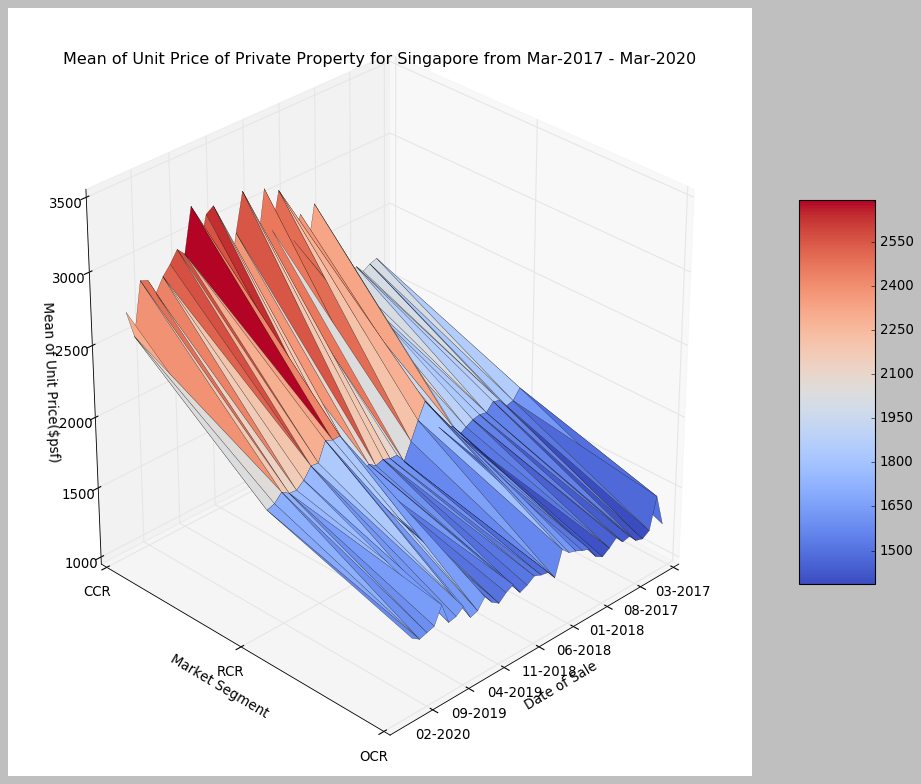

In [63]:
# Make the 3D surface  plot for mean of unit price
plt.style.use('classic')
fig = plt.figure(figsize = (15,12))
ax = fig.gca(projection='3d')
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df_up['Date of Sale'], df_up['Market Segment'], df_up['Mean of Unit Price ($psf)'], cmap=plt.cm.coolwarm, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
ax.set_xticks([0,5,10,15,20,25,30,35])
ax.set_xticklabels( ['03-2017','08-2017','01-2018','06-2018','11-2018','04-2019','09-2019','02-2020'])
ax.set_xlabel('Date of Sale')
ax.set_yticks([1,2,3])
ax.set_yticklabels(['CCR','RCR','OCR'])
ax.set_ylabel('Market Segment')
ax.set_zlabel('Mean of Unit Price($psf)')
ax.set_title('Mean of Unit Price of Private Property for Singapore from Mar-2017 - Mar-2020',fontsize = 'large',color = 'black')
# Rotate it
ax.view_init(30, 45)
plt.show()


Using Word Cloud Analyze Number of Private Property Project for Every Area in Singapore from Mar-2017 to Mar-2020

In [6]:
df_cc = pd.DataFrame(df_pp,columns= ['Postal District'])
df_cc['Postal District'] = df_cc['Postal District'].map(df.set_index('Postal district')['General location'])
df_cc['Postal District']= df_cc['Postal District'].str.replace(" ","",regex = True)
df_cc.head()
#df_cc.shape

Postal District
0  PasirPanjang,HongLeongGarden,ClementiNewTown
1              BukitMerah,Queenstown,TiongBahru
2  PasirPanjang,HongLeongGarden,ClementiNewTown
3              BukitMerah,Queenstown,TiongBahru
4              BukitMerah,Queenstown,TiongBahru

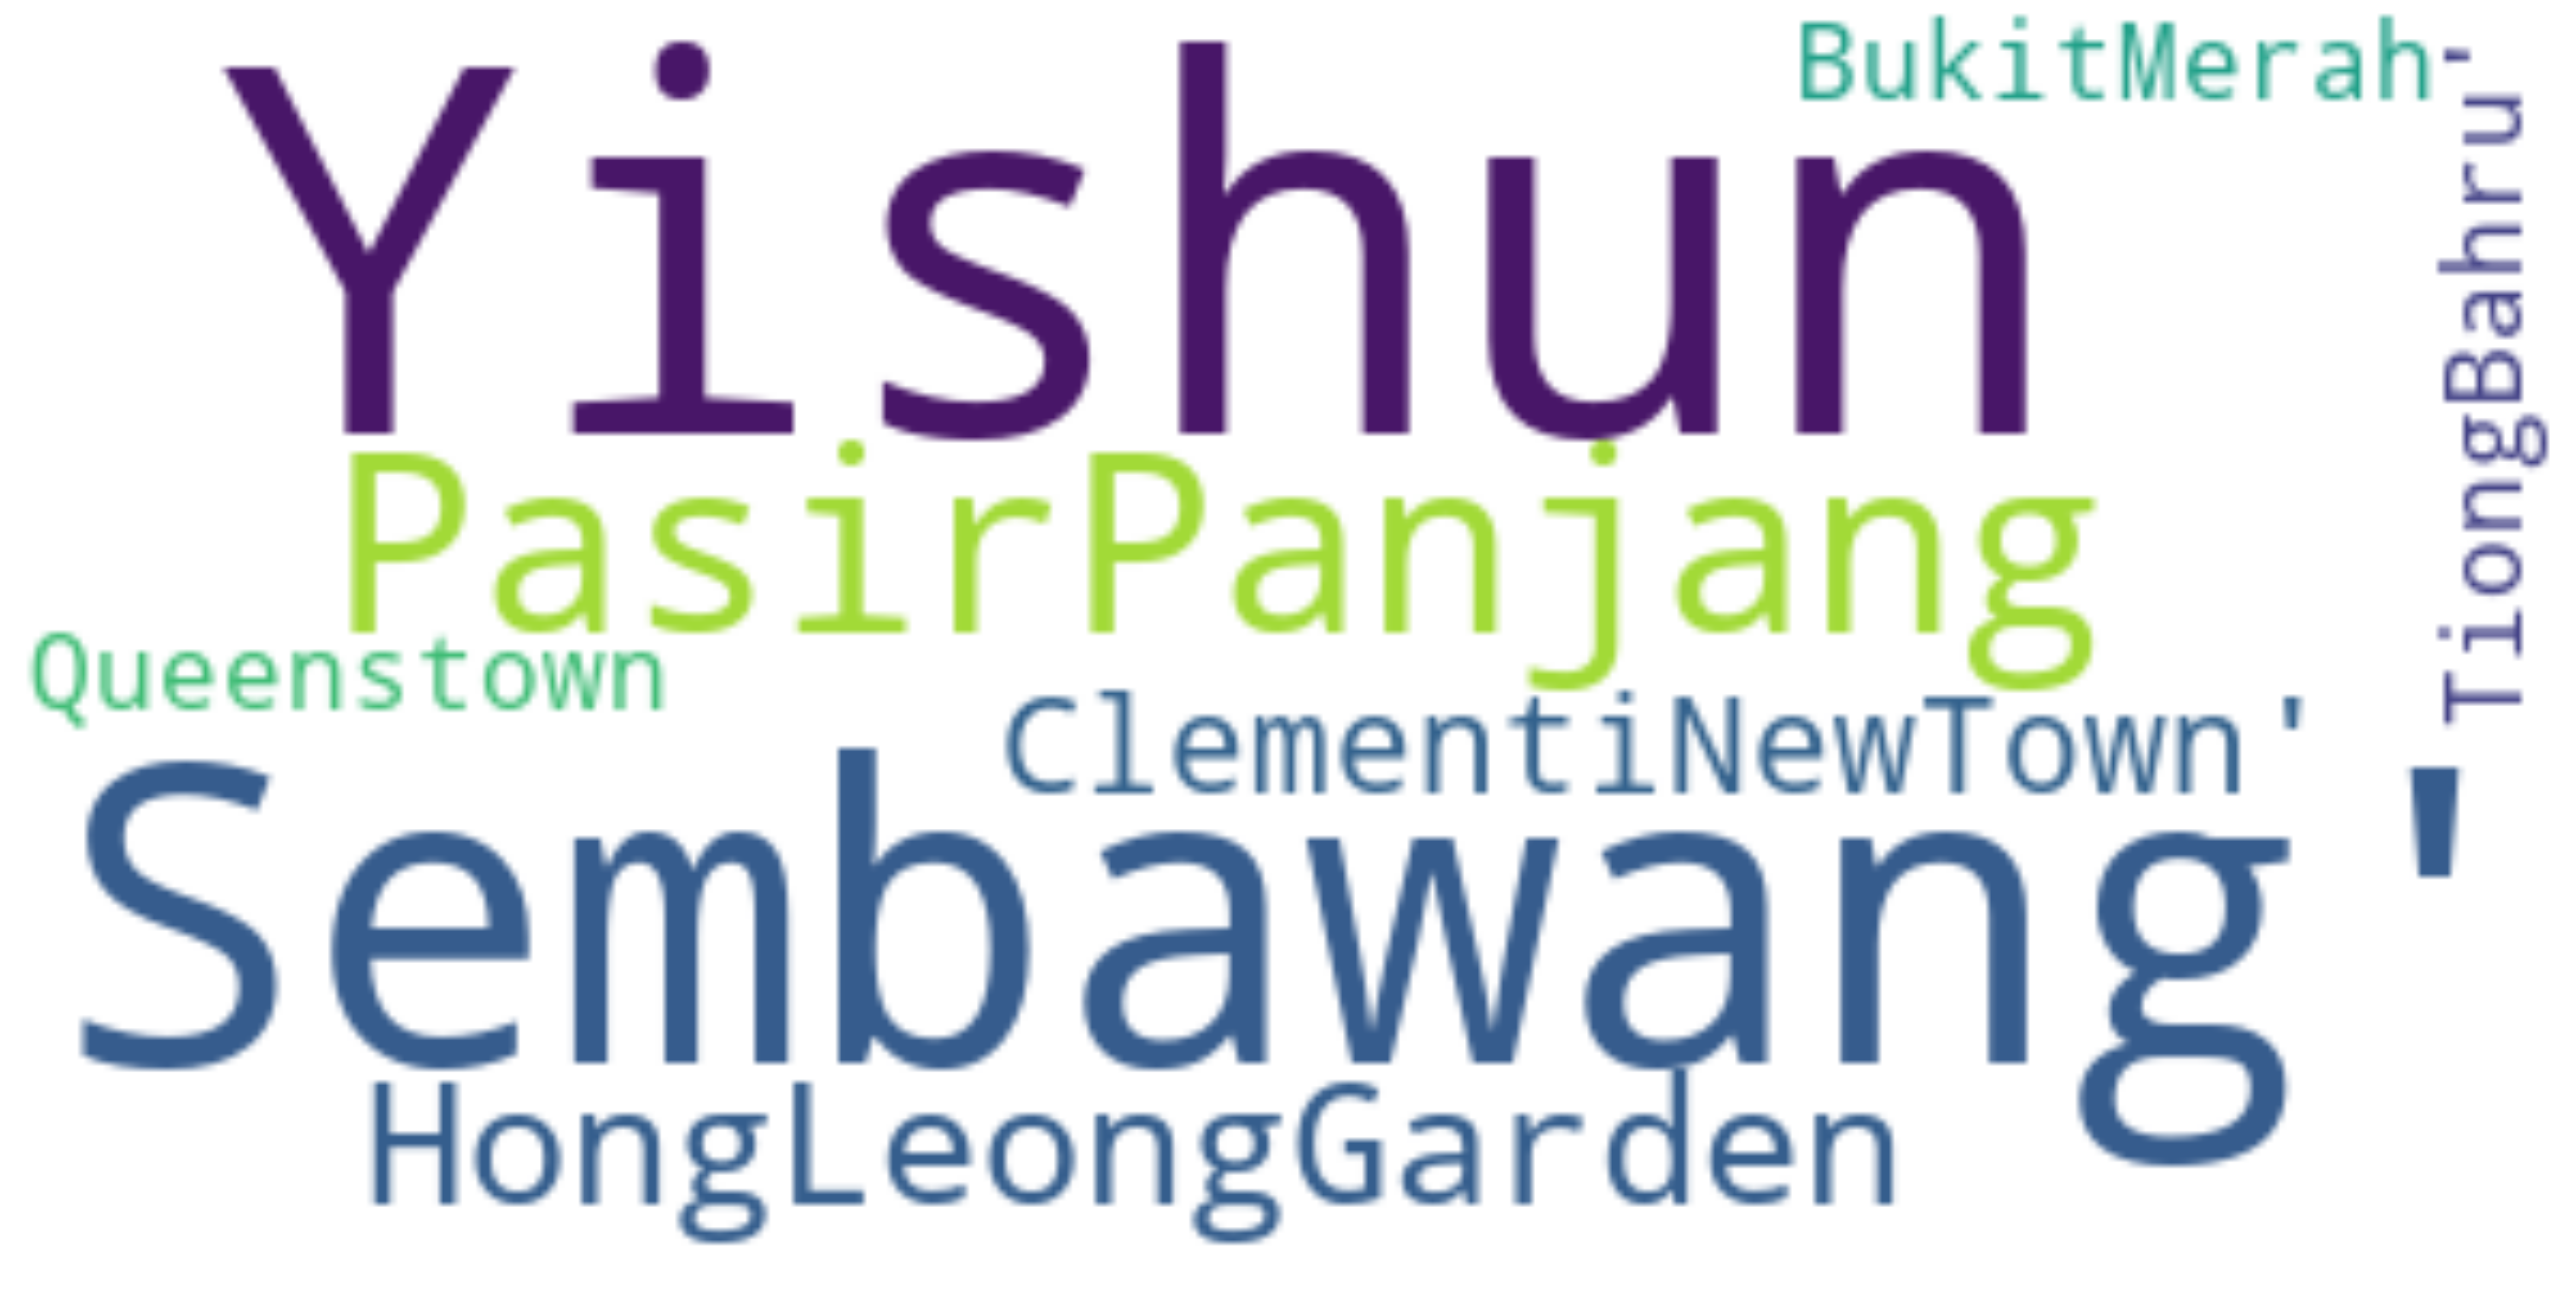

In [8]:
text = df_cc['Postal District'].values
wordcloud = WordCloud(background_color = 'white').generate(str(text))
fig = plt.figure( figsize = (100, 75))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.tight_layout(pad=0)
plt.show()